In [1]:
from google.colab import drive
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import ast
import re
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the preprocessed dataset
file_path = '/content/drive/My Drive/dbscan_clustering_results_bert.csv'
dataset = pd.read_csv(file_path)

# Check if the dataset is loaded correctly and display column names
print("Columns in dataset:", dataset.columns)

Mounted at /content/drive
Columns in dataset: Index(['Subreddit', 'Titolo', 'Testo', 'Data', 'Testo_tokenized',
       'Testo_cleaned', 'Testo_filtered', 'Testo_lemmatized',
       'bert_embeddings', 'dbscan_labels'],
      dtype='object')


In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import ast
import re
if 'bert_embeddings' not in dataset.columns:
    raise KeyError("The column 'bert_embeddings' is not found in the dataset.")

# Function to fix formatting issues
def fix_formatting(embedding_str):
    try:
        # Add commas between numbers that are not already separated by commas
        corrected_str = re.sub(r'(\d)\s+(-?\d)', r'\1, \2', embedding_str)
        return ast.literal_eval(corrected_str)
    except (SyntaxError, ValueError) as e:
        print(f"Error in string: {embedding_str}\n{e}")
        return None

# Apply the function to the bert_embeddings column
dataset['bert_embeddings'] = dataset['bert_embeddings'].apply(fix_formatting)

# Drop rows with None values in 'bert_embeddings'
dataset.dropna(subset=['bert_embeddings'], inplace=True)

# Ensure all embeddings are lists and have the correct length
valid_embeddings = dataset['bert_embeddings'].apply(lambda x: isinstance(x, list) and len(x) == 768)
dataset = dataset[valid_embeddings]

# Convert BERT embeddings to a NumPy array
bert_embeddings = np.array(dataset['bert_embeddings'].tolist())

# Determine the optimal number of clusters (k) using the Silhouette score
silhouette_scores = []
k_range = range(2, 11)  # Try k values from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(bert_embeddings)
    silhouette_scores.append(silhouette_score(bert_embeddings, cluster_labels))

# Find the optimal k with the highest Silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters (k):", optimal_k)

# Apply K-means with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
dataset['cluster_labels'] = kmeans_optimal.fit_predict(bert_embeddings)

# Calculate Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(bert_embeddings, dataset['cluster_labels'])
print("Davies-Bouldin Index:", davies_bouldin_index)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters (k): 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index: 3.0757893902924627


Mounted at /content/drive
Columns in dataset: Index(['Subreddit', 'Titolo', 'Testo', 'Data', 'Testo_tokenized',
       'Testo_cleaned', 'Testo_filtered', 'Testo_lemmatized',
       'bert_embeddings', 'dbscan_labels'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters (k): 2
Silhouette scores: [0.1902285949646582, 0.1697011517494009, 0.09039288857255263, 0.10333933249876118, 0.05389781801142389, 0.07512748459465084, 0.05069315639012197, 0.051986812802599, 0.04139748660639585]


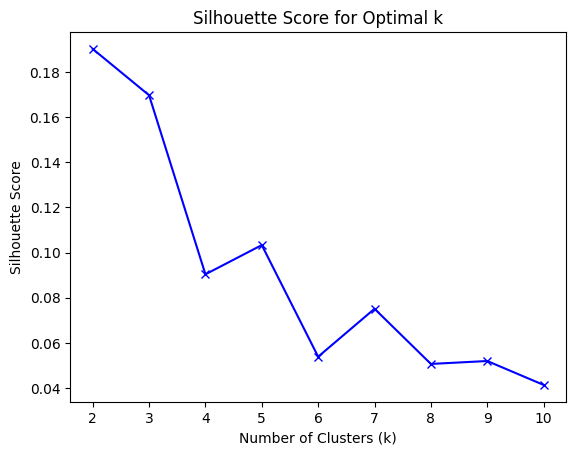

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index: 3.0757893902924627


In [3]:
# prompt: stampa anche silhouitte score e un grafico che faccia capire il k migliore

from google.colab import drive
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import ast
import re
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the preprocessed dataset
file_path = '/content/drive/My Drive/dbscan_clustering_results_bert.csv'
dataset = pd.read_csv(file_path)

# Check if the dataset is loaded correctly and display column names
print("Columns in dataset:", dataset.columns)
if 'bert_embeddings' not in dataset.columns:
    raise KeyError("The column 'bert_embeddings' is not found in the dataset.")

# Function to fix formatting issues
def fix_formatting(embedding_str):
    try:
        # Add commas between numbers that are not already separated by commas
        corrected_str = re.sub(r'(\d)\s+(-?\d)', r'\1, \2', embedding_str)
        return ast.literal_eval(corrected_str)
    except (SyntaxError, ValueError) as e:
        print(f"Error in string: {embedding_str}\n{e}")
        return None

# Apply the function to the bert_embeddings column
dataset['bert_embeddings'] = dataset['bert_embeddings'].apply(fix_formatting)

# Drop rows with None values in 'bert_embeddings'
dataset.dropna(subset=['bert_embeddings'], inplace=True)

# Ensure all embeddings are lists and have the correct length
valid_embeddings = dataset['bert_embeddings'].apply(lambda x: isinstance(x, list) and len(x) == 768)
dataset = dataset[valid_embeddings]

# Convert BERT embeddings to a NumPy array
bert_embeddings = np.array(dataset['bert_embeddings'].tolist())

# Determine the optimal number of clusters (k) using the Silhouette score
silhouette_scores = []
k_range = range(2, 11)  # Try k values from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(bert_embeddings)
    silhouette_scores.append(silhouette_score(bert_embeddings, cluster_labels))

# Find the optimal k with the highest Silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters (k):", optimal_k)
print("Silhouette scores:", silhouette_scores)  # Print Silhouette scores

# Plot Silhouette scores to visualize the optimal k
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Apply K-means with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
dataset['cluster_labels'] = kmeans_optimal.fit_predict(bert_embeddings)

# Calculate Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(bert_embeddings, dataset['cluster_labels'])
print("Davies-Bouldin Index:", davies_bouldin_index)



In [11]:
# prompt: salvami in un file excel i label trovati con k means sugli embeddings stampami quanti commenti per ogni cluster, saòva commento e cluster di appartenenza,salvali nel drive

import pandas as pd
# Crea un DataFrame con commenti e cluster corrispondenti
cluster_df = pd.DataFrame({
    'Commento': dataset['Testo'],  # Assumi che 'Commento' sia la colonna dei commenti
    'Cluster': dataset['cluster_labels']
})

# Conta il numero di commenti per ogni cluster
cluster_counts = cluster_df['Cluster'].value_counts()
print(cluster_counts)

# Salva il DataFrame in un file Excel su Google Drive
output_file_path = '/content/drive/My Drive/kmeans_cluster_results.xlsx'
cluster_df.to_excel(output_file_path, index=False)
print(f"Risultati salvati in: {output_file_path}")


Cluster
1    12589
0     3982
Name: count, dtype: int64
Risultati salvati in: /content/drive/My Drive/kmeans_cluster_results.xlsx


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters (k) with PCA: 2
Silhouette scores with PCA: [0.25685053760710524, 0.2346450213430553, 0.1251826878179524, 0.14032404815205302, 0.13582048932315455, 0.1355974447175549, 0.09429124784312966, 0.08823217735860925, 0.0912718787521729]


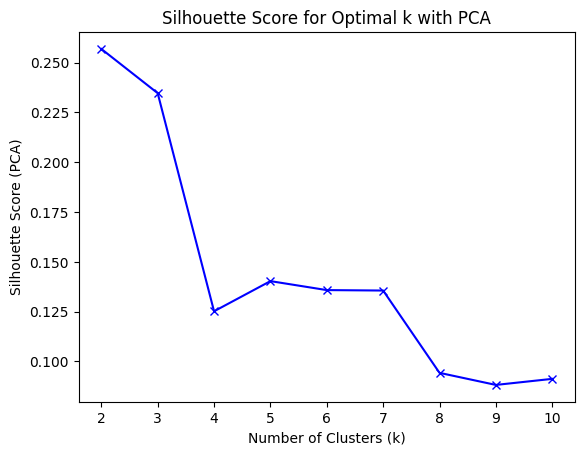

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index with PCA: 2.405386143917555


In [6]:
# prompt: adesso appplica k means ma prima riduci la dimensionalita dei bert embedding con pca, stampa i k al variare del silhoutte score con grafico

import matplotlib.pyplot as plt
import numpy as np
# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Reduce to 50 components (adjust as needed)
bert_embeddings_pca = pca.fit_transform(bert_embeddings)

# Determine the optimal number of clusters (k) using the Silhouette score with PCA
silhouette_scores_pca = []
k_range = range(2, 11)  # Try k values from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels_pca = kmeans.fit_predict(bert_embeddings_pca)
    silhouette_scores_pca.append(silhouette_score(bert_embeddings_pca, cluster_labels_pca))

# Find the optimal k with the highest Silhouette score (PCA)
optimal_k_pca = k_range[np.argmax(silhouette_scores_pca)]
print("Optimal number of clusters (k) with PCA:", optimal_k_pca)
print("Silhouette scores with PCA:", silhouette_scores_pca)  # Print Silhouette scores with PCA

# Plot Silhouette scores with PCA to visualize the optimal k
plt.plot(k_range, silhouette_scores_pca, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score (PCA)')
plt.title('Silhouette Score for Optimal k with PCA')
plt.show()

# Apply K-means with the optimal k (PCA)
kmeans_optimal_pca = KMeans(n_clusters=optimal_k_pca, random_state=42)
dataset['cluster_labels_pca'] = kmeans_optimal_pca.fit_predict(bert_embeddings_pca)

# Calculate Davies-Bouldin Index with PCA
davies_bouldin_index_pca = davies_bouldin_score(bert_embeddings_pca, dataset['cluster_labels_pca'])
print("Davies-Bouldin Index with PCA:", davies_bouldin_index_pca)


In [8]:
# prompt: stampami quanti commenti ci sono per ogni cluster sui pca embeddings

# Conta il numero di commenti per ogni cluster (PCA embeddings)
cluster_counts_pca = dataset['cluster_labels_pca'].value_counts()
print("Numero di commenti per ogni cluster (PCA embeddings):")
print(cluster_counts_pca)


Numero di commenti per ogni cluster (PCA embeddings):
cluster_labels_pca
0    12616
1     3955
Name: count, dtype: int64
